In [1]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the dataset
file_path = "/content/Bank-Customer-Attrition-Insights-Data.csv"
df = pd.read_csv(file_path)

# Select relevant numerical columns
numerical_columns = ["CreditScore", "Balance", "NumOfProducts"]

# Compute summary statistics separately
summary_stats = pd.DataFrame({
    "Mean": df[numerical_columns].mean(),
    "Median": df[numerical_columns].median(),
    "Standard Deviation": df[numerical_columns].std(),
    "Skewness": df[numerical_columns].apply(skew),
    "Kurtosis": df[numerical_columns].apply(kurtosis)
})

print(summary_stats)


                       Mean    Median  Standard Deviation  Skewness  Kurtosis
CreditScore      650.528800    652.00           96.653299 -0.071596 -0.426113
Balance        76485.889288  97198.54        62397.405202 -0.141088 -1.489267
NumOfProducts      1.530200      1.00            0.581654  0.745456  0.582089


In [2]:
import pandas as pd

# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Distribution of customers by Gender and Geography
gender_distribution = df["Gender"].value_counts()
geography_distribution = df["Geography"].value_counts()

# Distribution of customers by Age (grouped into bins)
age_bins = pd.cut(df["Age"], bins=[18, 30, 40, 50, 60, 100], labels=["18-30", "31-40", "41-50", "51-60", "61+"])
age_distribution = age_bins.value_counts().sort_index()

# Display the results
print("Gender Distribution:\n", gender_distribution)
print("\nGeography Distribution:\n", geography_distribution)
print("\nAge Distribution:\n", age_distribution)


Gender Distribution:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Geography Distribution:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Age Distribution:
 Age
18-30    1946
31-40    4451
41-50    2320
51-60     797
61+       464
Name: count, dtype: int64


In [3]:
import pandas as pd

# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Assuming 'NumOfProducts' represents transaction count and 'IsActiveMember' defines active/inactive customers
transaction_stats = df.groupby("IsActiveMember")["NumOfProducts"].agg(["min", "max", "mean"])

# Rename the index for better readability
transaction_stats.index = ["Inactive Customers", "Active Customers"]

# Display the results
print(transaction_stats)


                    min  max      mean
Inactive Customers    1    4  1.524438
Active Customers      1    4  1.535624


Correlation Matrix:
                CreditScore   Balance  NumOfProducts
CreditScore       1.000000  0.006268       0.012238
Balance           0.006268  1.000000      -0.304180
NumOfProducts     0.012238 -0.304180       1.000000


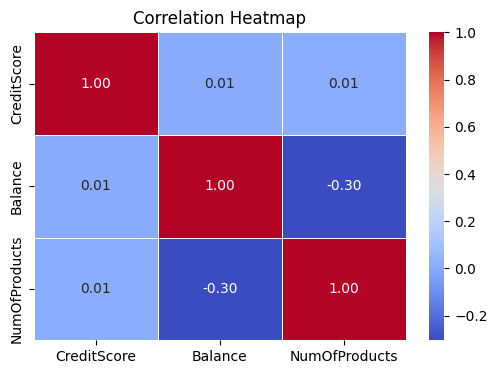

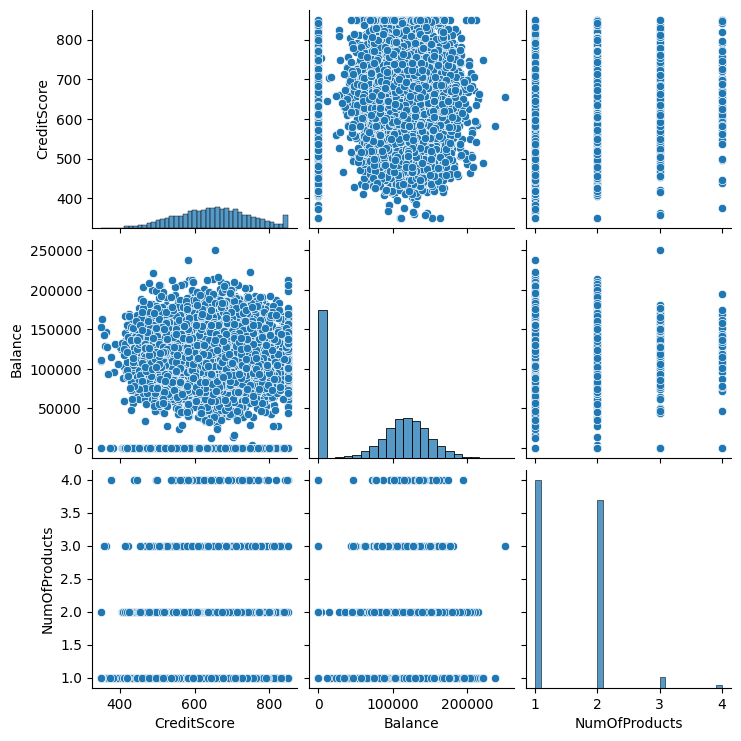

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Select relevant numerical columns
numerical_columns = ["CreditScore", "Balance", "NumOfProducts"]

# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Display correlation values
print("Correlation Matrix:\n", correlation_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df[numerical_columns])
plt.show()


              Balance                                          NumOfProducts  \
                 mean     median  min        max           std          mean   
Stayed   72742.750663   92063.06  0.0  221532.80  62851.577108      1.544210   
Churned  91109.476006  109344.23  0.0  250898.09  58346.483197      1.475466   

                                  
        median min max       std  
Stayed     2.0   1   3  0.509542  
Churned    1.0   1   4  0.801408  


<ipython-input-5-f846f55997cc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"], y=df["Balance"], palette="coolwarm")


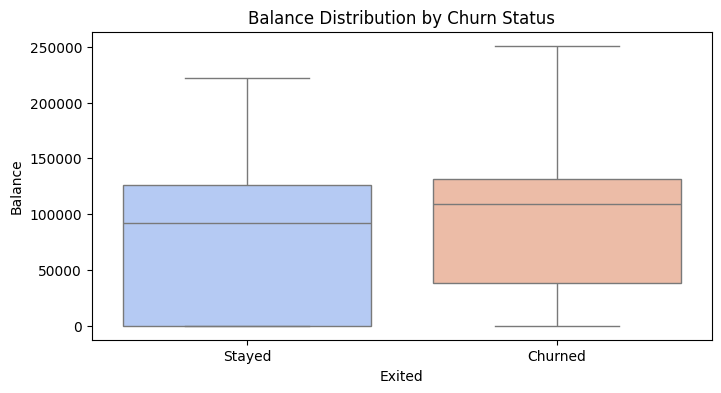

<ipython-input-5-f846f55997cc>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Exited"], y=df["NumOfProducts"], palette="coolwarm")


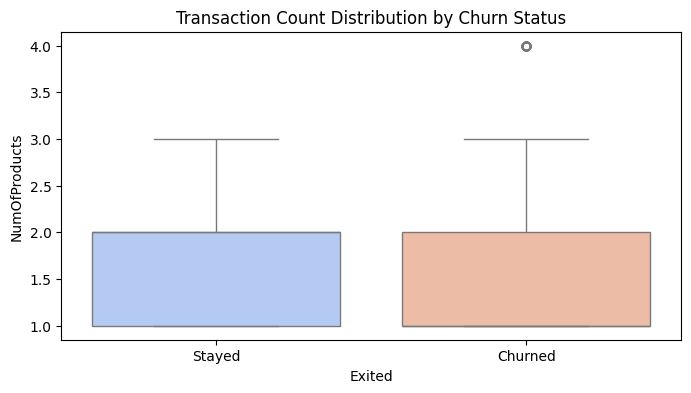

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Assuming 'Exited' column indicates churn (1 = Churned, 0 = Stayed)
churn_stats = df.groupby("Exited")[["Balance", "NumOfProducts"]].agg(["mean", "median", "min", "max", "std"])

# Rename index for better readability
churn_stats.index = ["Stayed", "Churned"]

# Display the statistics
print(churn_stats)

# Visualizing Balance distribution by churn status
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Exited"], y=df["Balance"], palette="coolwarm")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.title("Balance Distribution by Churn Status")
plt.show()

# Visualizing Transaction Count distribution by churn status
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Exited"], y=df["NumOfProducts"], palette="coolwarm")
plt.xticks([0, 1], ["Stayed", "Churned"])
plt.title("Transaction Count Distribution by Churn Status")
plt.show()


In [6]:
import pandas as pd

# Load the dataset
file_path = "Bank-Customer-Attrition-Insights-Data.csv"  # Update the path if needed
df = pd.read_csv(file_path)

# Define thresholds
low_credit_threshold = 600  # Consider credit scores below 600 as low
high_balance_threshold = df["Balance"].median()  # Consider balances above median as high

# Calculate counts
total_customers = len(df)
low_credit_high_balance = len(df[(df["CreditScore"] < low_credit_threshold) & (df["Balance"] > high_balance_threshold)])

# Compute probability
probability = low_credit_high_balance / total_customers

# Display result
print(f"Probability that a customer has both a low credit score and a high balance: {probability:.4f}")


Probability that a customer has both a low credit score and a high balance: 0.1499
